# Project Title  Comcast Telecom Consumer Complaints .



DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

## Data Preparation and Cleaning

**TODO** -We will verify datatypes and missing values in our dataset and create new column by extracting month from Date column


In [1]:
# importing required libraries

import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
# read data
complaint_df=pd.read_csv('Comcast_telecom_complaints_data.csv')


In [3]:
# lookout first five rows
complaint_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


we got all object(string) datatype except zip code column but it is also considered as object type as numbers in zip code indicates one location they dont have any meaning rather than this. so we will convert zipcode column to string and  date column as date datatype 

In [5]:
# coverting date column to datetime datatype
complaint_df.Date=pd.to_datetime(complaint_df.Date)

In [6]:
complaint_df['Zip code']=complaint_df['Zip code'].astype(str)

In [7]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   object        
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usa

In [8]:
# lets verify is there any null value or not
complaint_df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [9]:
# Lets extract month from date column
complaint_df['month']=complaint_df.Date.dt.month

In [10]:
complaint_df['month']=complaint_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [11]:
complaint_df['month'].head()

0    April
1    April
2    April
3      May
4      May
Name: month, dtype: object

## Exploratory Analysis and Visualization

**TODO** - we will lookout total complaints received over the dates and over the months 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Lookout complaints over the date

<AxesSubplot:xlabel='Date'>

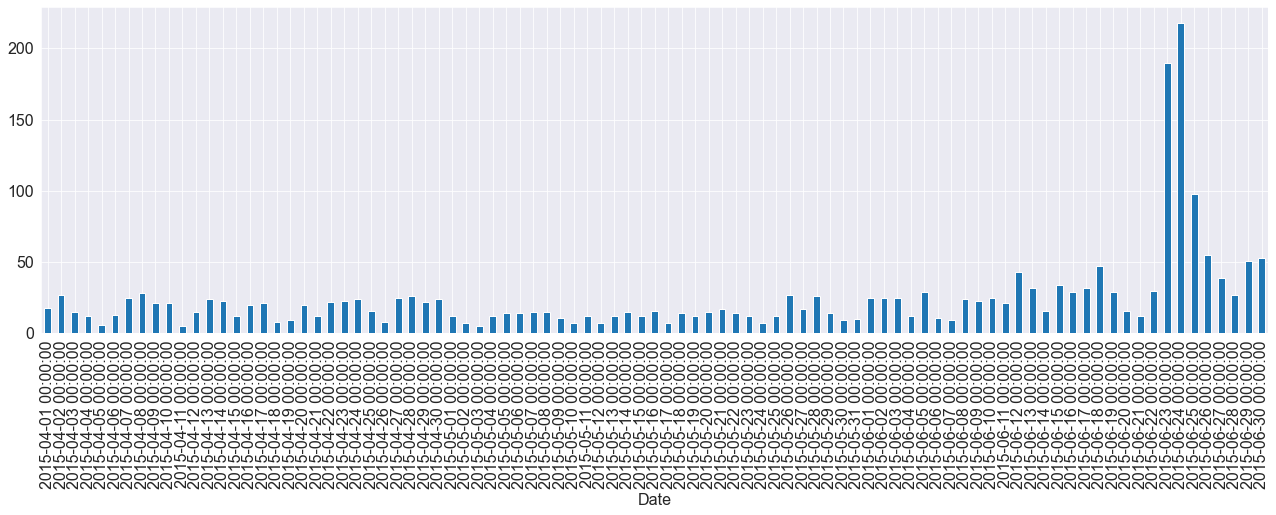

In [13]:
complaint_df['Customer Complaint'].groupby(complaint_df.Date).count().plot(kind='bar',figsize=(22,6))

**Highest complaints ( more than 200 ) received on Date 24.06.2015**

**TODO** - Look out complaints over the month

<AxesSubplot:>

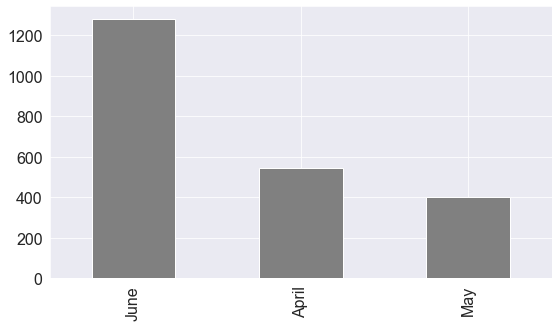

In [14]:
complaint_df['month'].value_counts().plot(kind='bar',color='grey')

**We got highest number of complaints in the month of june according to dataset**

**TODO** - Look out the status of complaints over the months 

<AxesSubplot:xlabel='month', ylabel='count'>

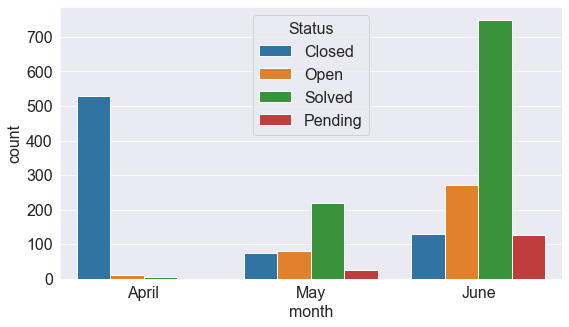

In [15]:
sns.countplot(x='month', hue='Status', data=complaint_df)

## Asking and Answering Questions

#### Q1: Find out which complaints are maximum

In [16]:
from collections import Counter
c_count = Counter(complaint_df['Customer Complaint'])
d=c_count.most_common(10)
d=pd.DataFrame(d,columns=['type','count'])
d

,type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Data Caps,11
6,Comcast Billing,11
7,Unfair Billing Practices,9
8,Internet speed,8
9,Comcast data caps,8


*from above top type counts it is clear that maximum complaints are coming for internet issue*

#### Q2: Which state has max complaints

In [17]:
statewise_df=complaint_df[['Ticket #', 'State']].groupby('State').count().sort_values(by='Ticket #',ascending=False)
statewise_df.head()

,Ticket #
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


<AxesSubplot:xlabel='State'>

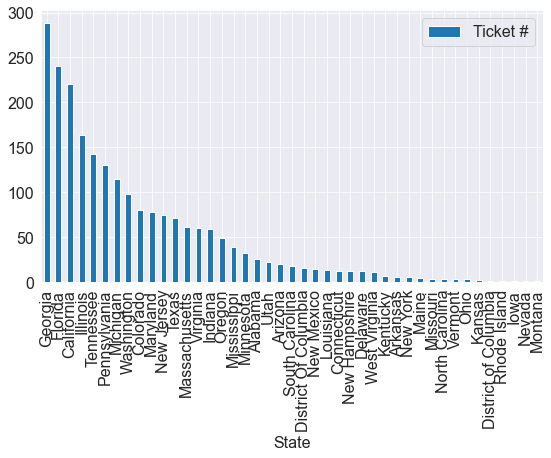

In [18]:
statewise_df.plot(kind='bar')

**Georgia state has received maximum customer complaints we have to give special attention to that state**
**Georgia,Florida and california are three states from where maximum complaints were received**

#### Q3: Calculating statewise complaint resolving rate

In [19]:
complaint_df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

*we will consider open and pending as open and close and solved as closed*

In [20]:
complaint_df['open/closed']=complaint_df['Status'].apply(lambda x: 'Closed' if (x =='Solved'or x== 'Closed') else 'Open')

In [21]:
Statewise_solving_rate=complaint_df.groupby(['State','open/closed'])['open/closed'].count().unstack().fillna(0)
Statewise_solving_rate=pd.DataFrame(Statewise_solving_rate)
Statewise_solving_rate.head(2)

open/closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0


In [22]:
Statewise_solving_rate['unresolved complaint percent']=(Statewise_solving_rate['Open']/Statewise_solving_rate['Closed']*100)

In [23]:
Statewise_solving_rate.head()

open/closed,Closed,Open,unresolved complaint percent
State,,,
Alabama,17.0,9.0,52.941176
Arizona,14.0,6.0,42.857143
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,38.364780
Colorado,58.0,22.0,37.931034


<AxesSubplot:xlabel='State'>

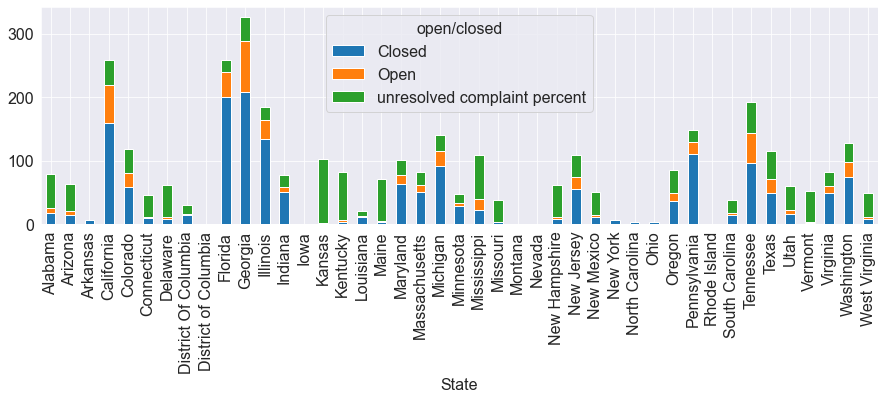

In [24]:
Statewise_solving_rate.plot(kind='bar',stacked=True,figsize=(15,4))

**from above stacked chart it is clear that max complaint states having around 70% complaint resolving rate
and state Kansas havis 1.0 unresolved complaint out of 1.0 received complaint thus unresolved percentage complaint is 100%**

#### Q4: % of complaints resolved till date

In [25]:
compl=complaint_df.groupby(['Received Via','open/closed'])['Received Via'].count().unstack()
compl

open/closed,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [26]:
compl=complaint_df['open/closed'].value_counts()
compl

Closed    1707
Open       517
Name: open/closed, dtype: int64

In [27]:
totcompl=len(complaint_df)
totcompl

2224

In [28]:
for x in compl.values:
    l=(x/totcompl*100)
    print(l)

76.75359712230215
23.246402877697843


Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

We have seen that total complaint resolved rate is **76.7%** to improve this we have to lookout the state of **Georgia,Florida and california** from where maximum complaints received and the month of **June** as maximum complaints received in this month. We should look out the reason behind this.